In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine
import seaborn as sns

In [3]:
wine = load_wine()

In [4]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)

In [5]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [9]:
df_clean = df[['alcohol', 'total_phenols', 'flavanoids']].copy()

In [10]:
df_clean.columns = ['Feature_1', 'Feature_2', 'Feature_3']

In [12]:
df.head()

,Feature_1,Feature_2,Feature_3
0,14.23,2.80,3.06
1,13.20,2.65,2.76
2,13.16,2.80,3.24
3,14.37,3.85,3.49
4,13.24,2.80,2.69


In [14]:
df_clean = df

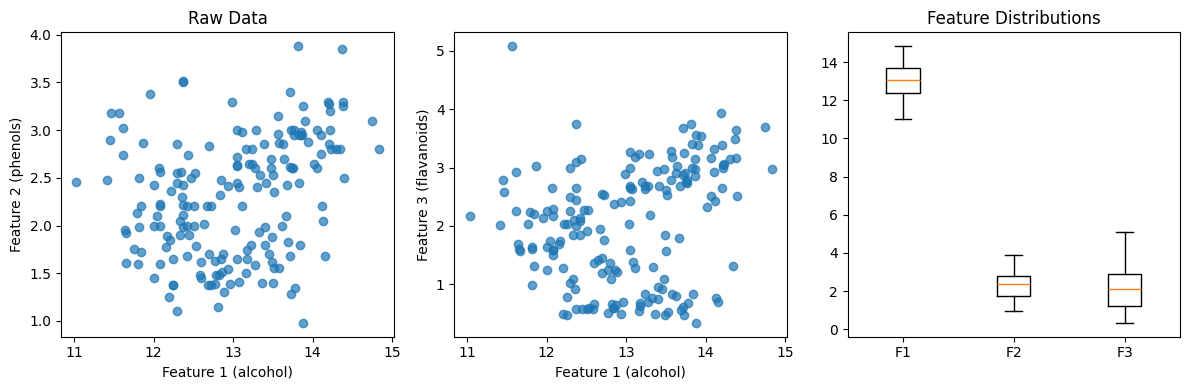

In [18]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.scatter(df_clean['Feature_1'], df_clean['Feature_2'], alpha = 0.7)
plt.xlabel('Feature 1 (alcohol)')
plt.ylabel('Feature 2 (phenols)')
plt.title('Raw Data')
plt.subplot(1,3,2)
plt.scatter(df_clean['Feature_1'], df_clean['Feature_3'], alpha = 0.7)
plt.xlabel('Feature 1 (alcohol)')
plt.ylabel('Feature 3 (flavanoids)')
plt.subplot(1,3,3)

plt.boxplot([df_clean['Feature_1'], df_clean['Feature_2'], df_clean['Feature_3']], 
            labels = ['F1', 'F2','F3'])
plt.title('Feature Distributions')
plt.tight_layout()
plt.show()

In [19]:
# standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

In [24]:
df_clean.columns

Index(['Feature_1', 'Feature_2', 'Feature_3'], dtype='object')

In [23]:
df_clean['Feature_1'].mean()

13.00061797752809

In [27]:
df_clean['Feature_2'].mean()

2.295112359550562

In [28]:
df_clean['Feature_3'].mean()

2.0292696629213487

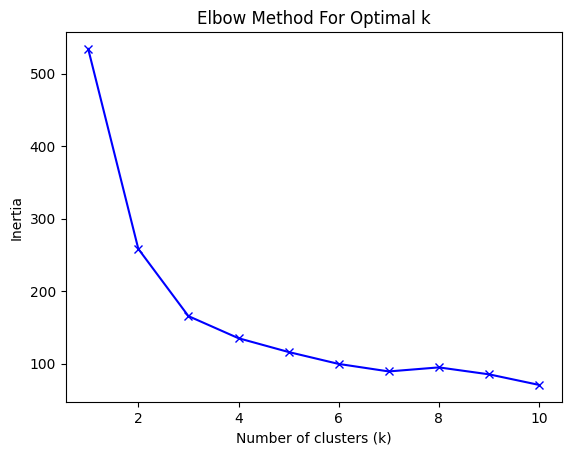

In [29]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
k_values = range(2, 8)
scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)
    print(f"K={k}: Silhouette Score = {score:.3f}")


K=2: Silhouette Score = 0.448
K=3: Silhouette Score = 0.436
K=4: Silhouette Score = 0.369
K=5: Silhouette Score = 0.315
K=6: Silhouette Score = 0.320
K=7: Silhouette Score = 0.314


In [33]:
kmeans_final = KMeans(n_clusters = 7, random_state = 42 )

df_clean['Cluster'] = kmeans_final.fit_predict(X_scaled)

In [35]:
df_clean['Cluster'] .value_counts()

Cluster
2    32
5    31
4    31
3    30
1    25
6    19
0    10
Name: count, dtype: int64

In [39]:
from sklearn.decomposition  import PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_.round(3)
pca.explained_variance_ratio_.sum()

0.9554338989107141

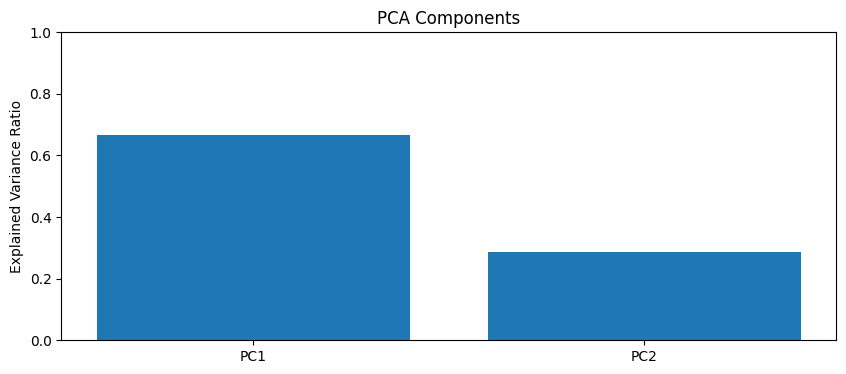

In [40]:
plt.figure(figsize = (10,4))
plt.bar(['PC1', 'PC2'], pca.explained_variance_ratio_)
plt.ylabel('Explained Variance Ratio')

plt.title('PCA Components')
plt.ylim(0,1)
plt.show()